#Header

Linear and Decision Tree Regression Modeling

Sarah Kim

#Task I: Set-Up, Data Importation, and Data Exploration

##A

In [5]:
#Load packages
# Mathematics and Statistics Packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from scipy.stats import f_oneway
from sklearn.feature_selection import f_regression

# Graphical Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Colab Packages
from google.colab import drive
from google.colab import data_table

# Data Preparation Packages
from sklearn.model_selection import train_test_split

# Linear Regression Packages
from sklearn.linear_model import LinearRegression

# Decision Tree Packages
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import plot_tree

# Model Evaluation Packages
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Cross-Validation Packages
from sklearn.model_selection import cross_validate

In [6]:
#set random state value
random_state = 0

In [7]:
#pre defined function
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

##B: Import dataset 

In [8]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
sales_df = pd.read_csv('/content/gdrive/MyDrive/Data_Sets/NA_sales_filtered.csv', encoding = "ISO-8859-1")

##C: Data Summary

In [10]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          6345 non-null   object 
 1   Platform      6345 non-null   object 
 2   Genre         6345 non-null   object 
 3   Rating        6345 non-null   object 
 4   Critic_Score  6345 non-null   int64  
 5   Critic_Count  6345 non-null   int64  
 6   User_Score    6345 non-null   int64  
 7   User_Count    6345 non-null   int64  
 8   NA_Sales      6345 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 446.3+ KB


In [11]:
sales_df.describe(include='all')

Name Platform   Genre Rating  Critic_Score  Critic_Count  \
count            6345     6345    6345   6345   6345.000000   6345.000000   
unique           4088       16      12      5           NaN           NaN   
top     Madden NFL 07      PS2  Action      T           NaN           NaN   
freq                8     1135    1549   2182           NaN           NaN   
mean              NaN      NaN     NaN    NaN     69.819385     28.966745   
std               NaN      NaN     NaN    NaN     13.945811     19.098594   
min               NaN      NaN     NaN    NaN     13.000000      3.000000   
25%               NaN      NaN     NaN    NaN     61.000000     14.000000   
50%               NaN      NaN     NaN    NaN     72.000000     25.000000   
75%               NaN      NaN     NaN    NaN     80.000000     40.000000   
max               NaN      NaN     NaN    NaN     98.000000    113.000000   

         User_Score    User_Count     NA_Sales  
count   6345.000000   6345.000000  6345.000000  
unique          NaN           NaN          NaN  
top             NaN           NaN          NaN  
freq            NaN           NaN          NaN  
mean      70.765485    152.730969     0.354230  
std       14.438432    545.962483     0.494404  
min        5.000000      4.000000     0.010000  
25%       64.000000     10.000000     0.080000  
50%       74.000000     24.000000     0.170000  
75%       81.000000     77.000000     0.410000  
max       95.000000  10665.000000     3.490000

In [12]:
sales_df.head(20)

Name Platform         Genre  \
0                               Final Fantasy VII       PS  Role-Playing   
1                                 Final Fantasy X      PS2  Role-Playing   
2                                      The Sims 3       PC    Simulation   
3                              Final Fantasy VIII       PS  Role-Playing   
4                                        Tekken 3       PS      Fighting   
5                       Medal of Honor: Frontline      PS2       Shooter   
6                  Uncharted 3: Drake's Deception      PS3        Action   
7                      Uncharted 2: Among Thieves      PS3        Action   
8                               World of Warcraft       PC  Role-Playing   
9                                          Driver       PS        Action   
10                              Final Fantasy XII      PS2  Role-Playing   
11                                       Tekken 2       PS      Fighting   
12                                        Destiny      PS4       Shooter   
13                   Monster Hunter Freedom Unite      PSP  Role-Playing   
14                            Batman: Arkham City      PS3        Action   
15                     Uncharted 4: A Thief's End      PS4       Shooter   
16                             Final Fantasy XIII      PS3  Role-Playing   
17                               Final Fantasy IX       PS  Role-Playing   
18                              Final Fantasy X-2      PS2  Role-Playing   
19  Dragon Quest VIII: Journey of the Cursed King      PS2  Role-Playing   

   Rating  Critic_Score  Critic_Count  User_Score  User_Count  NA_Sales  
0       T            92            20          91        1282      3.01  
1       T            92            53          86        1056      2.91  
2       T            86            75          75         886      0.99  
3       T            90            24          85         644      2.28  
4       T            96            15          90         367      3.27  
5       T            88            29          84         135      2.93  
6       T            92            97          82        3712      2.77  
7       T            96           105          87        5187      3.27  
8       T            93            57          72        2182      0.08  
9       T            87            22          80          78      3.11  
10      T            92            64          75         972      1.88  
11      T            89             8          88         102      2.26  
12      T            76            95          60        5380      2.49  
13      T            81            48          86         124      0.47  
14      T            96            42          85        2162      2.71  
15      T            93           113          78        7064      1.85  
16      T            83            83          72        2483      1.74  
17      T            94            22          88         779      1.62  
18      T            85            45          65         400      1.92  
19      T            89            63          87         245      0.65

##D: Data Exploration 

In [13]:
#Explore name column
name_counts = sales_df['Name'].value_counts()
name_counts

Madden NFL 07                                  8
Spider-Man 3                                   7
Madden NFL 08                                  7
LEGO Star Wars II: The Original Trilogy        7
LEGO Indiana Jones: The Original Adventures    7
                                              ..
Etrian Odyssey Untold: The Millennium Girl     1
Microsoft Flight Simulator X                   1
Mega Man Battle Network                        1
Colony Wars                                    1
Final Fantasy VII                              1
Name: Name, Length: 4088, dtype: int64

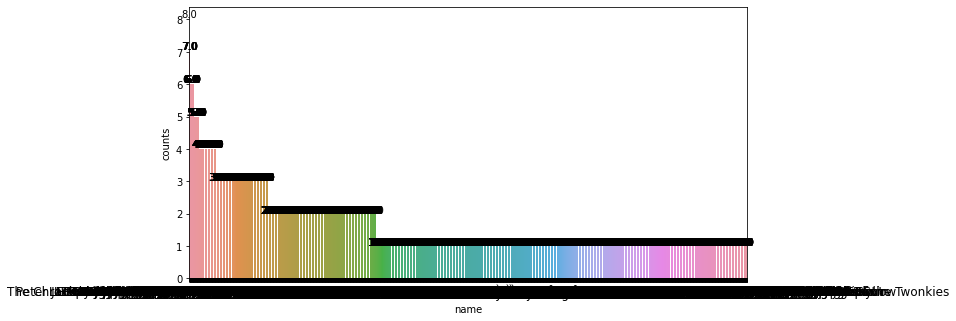

In [14]:
#plot name column
name_counts_df = name_counts.rename_axis('name').reset_index(name='counts')
fig = plt.figure(figsize=(10,5))
ax = sns.barplot(x='name',y='counts',data=name_counts_df)
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=0,size=12)
show_values(ax)

In [15]:
#Explore Platform column
platform_counts = sales_df['Platform'].value_counts()
platform_counts

PS2     1135
X360     848
PS3      749
XB       578
Wii      475
DS       457
PSP      379
GC       353
PC       304
GBA      238
PS4      210
XOne     158
PS       150
3DS      141
PSV       89
WiiU      81
Name: Platform, dtype: int64

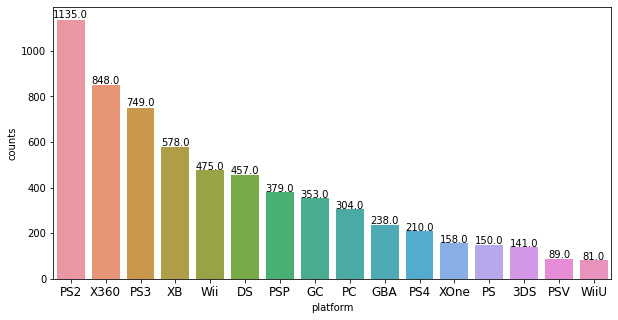

In [16]:
#plot platform column
platform_counts_df = platform_counts.rename_axis('platform').reset_index(name='counts')
fig = plt.figure(figsize=(10,5))
ax = sns.barplot(x='platform',y='counts',data=platform_counts_df)
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=0,size=12)
show_values(ax)

In [17]:
#Genre column
genre_counts = sales_df['Genre'].value_counts()
genre_counts

Action          1549
Sports           921
Shooter          798
Role-Playing     643
Racing           537
Platform         386
Misc             379
Fighting         360
Simulation       251
Adventure        215
Strategy         193
Puzzle           113
Name: Genre, dtype: int64

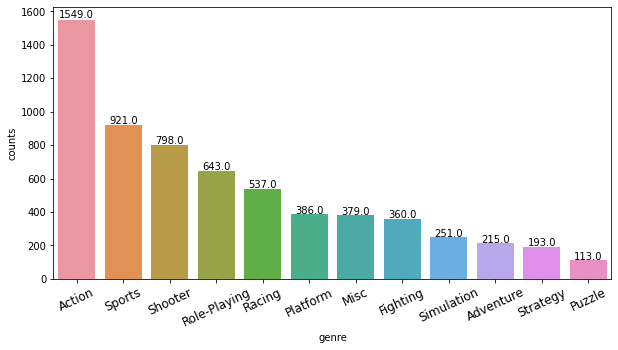

In [18]:
#plot genre column
genre_counts_df = genre_counts.rename_axis('genre').reset_index(name='counts')
fig = plt.figure(figsize=(10,5))
ax = sns.barplot(x='genre',y='counts',data=genre_counts_df)
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=25,size=12)
show_values(ax)

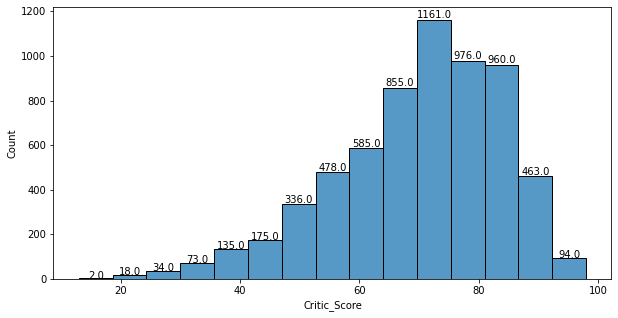

In [19]:
#Critic_score column
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(data=sales_df['Critic_Score'],bins=15)
show_values(ax)

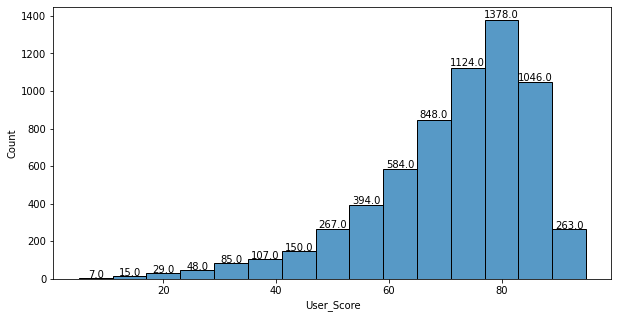

In [20]:
#User_score column
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(data=sales_df['User_Score'],bins=15)
show_values(ax)

### drop name column 

The name column generally doesn't have any correlation with sales, and having the name column would cause problem to our model. Besides, the name column just serves as an index, which cannot be generalized to other datasets. 

In [21]:
#Remove name column 
sales_df = sales_df.drop(columns = "Name")

In [22]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      6345 non-null   object 
 1   Genre         6345 non-null   object 
 2   Rating        6345 non-null   object 
 3   Critic_Score  6345 non-null   int64  
 4   Critic_Count  6345 non-null   int64  
 5   User_Score    6345 non-null   int64  
 6   User_Count    6345 non-null   int64  
 7   NA_Sales      6345 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 396.7+ KB


## E: Perform groupby on categorical columns

In [23]:
#Platform
sales_df.groupby(['Platform']).describe(include='float64')

NA_Sales                                                       
            count      mean       std   min     25%    50%     75%   max
Platform                                                                
3DS         141.0  0.250426  0.305228  0.01  0.0800  0.150  0.3000  2.03
DS          457.0  0.315492  0.443909  0.01  0.0800  0.150  0.3300  3.43
GBA         238.0  0.336092  0.469236  0.01  0.0600  0.170  0.4175  3.14
GC          353.0  0.284873  0.353012  0.01  0.0700  0.150  0.3400  2.60
PC          304.0  0.200724  0.424849  0.01  0.0200  0.050  0.1425  2.57
PS          150.0  0.544200  0.776311  0.01  0.0825  0.230  0.5775  3.42
PS2        1135.0  0.375304  0.521411  0.01  0.0700  0.160  0.4500  3.49
PS3         749.0  0.410881  0.523826  0.01  0.1200  0.230  0.4700  3.27
PS4         210.0  0.383333  0.543604  0.01  0.0400  0.140  0.4675  2.81
PSP         379.0  0.219393  0.304959  0.01  0.0700  0.120  0.2400  2.90
PSV          89.0  0.112809  0.124563  0.01  0.0300  0.080  0.1500  0.71
Wii         475.0  0.398947  0.481355  0.01  0.1100  0.230  0.4650  3.48
WiiU         81.0  0.378889  0.565117  0.01  0.0900  0.200  0.3600  3.15
X360        848.0  0.468432  0.585431  0.01  0.1100  0.240  0.5500  3.40
XB          578.0  0.249204  0.301924  0.01  0.0625  0.140  0.3200  2.09
XOne        158.0  0.481203  0.640789  0.01  0.0800  0.235  0.6300  3.22

In [24]:
#Genre
sales_df.groupby(['Genre']).describe(include='float64')

NA_Sales                                                     
                count      mean       std   min   25%    50%     75%   max
Genre                                                                     
Action         1549.0  0.344519  0.494515  0.01  0.08  0.160  0.3900  3.27
Adventure       215.0  0.178930  0.319406  0.01  0.05  0.090  0.1800  3.28
Fighting        360.0  0.350139  0.426072  0.01  0.09  0.205  0.4200  3.27
Misc            379.0  0.438338  0.575711  0.01  0.10  0.210  0.5050  3.49
Platform        386.0  0.368446  0.478433  0.01  0.09  0.195  0.4500  3.17
Puzzle          113.0  0.299292  0.480349  0.01  0.07  0.110  0.2800  3.43
Racing          537.0  0.340298  0.493117  0.01  0.07  0.150  0.3900  3.27
Role-Playing    643.0  0.323935  0.512838  0.01  0.07  0.140  0.3300  3.40
Shooter         798.0  0.396266  0.533859  0.01  0.07  0.190  0.4775  3.22
Simulation      251.0  0.369602  0.482114  0.01  0.06  0.190  0.4500  3.07
Sports          921.0  0.405136  0.494622  0.01  0.11  0.230  0.4800  3.42
Strategy        193.0  0.176632  0.287465  0.01  0.04  0.090  0.1900  2.57

In [25]:
#Rating
sales_df.groupby(['Rating']).describe(include='float64')

NA_Sales                                                  
           count      mean       std   min   25%   50%   75%   max
Rating                                                            
E         1968.0  0.390661  0.510266  0.01  0.09  0.19  0.48  3.43
E10+       877.0  0.307366  0.396112  0.01  0.08  0.17  0.37  3.48
M         1295.0  0.404819  0.571776  0.01  0.07  0.17  0.47  3.40
T         2182.0  0.312731  0.461576  0.01  0.07  0.15  0.34  3.49
missing     23.0  0.112609  0.140461  0.01  0.05  0.07  0.13  0.68

## F: Convert all integer variables to float datatypes

In [26]:
#Critic_Score
sales_df['Critic_Score'] = sales_df['Critic_Score'].astype('float64')


In [27]:
#eliminate outliners of Critic_Score
q1_critic_score = sales_df['Critic_Score'].quantile(0.25)
q3_critic_score = sales_df['Critic_Score'].quantile(0.75)
iqr_critic_score = q3_critic_score - q1_critic_score
sales_df = sales_df.loc[ (sales_df['Critic_Score'] > q1_critic_score - 1.5 * iqr_critic_score) & (sales_df['Critic_Score'] < q3_critic_score + 1.5 * iqr_critic_score) ]

In [28]:
#Critic_Count
sales_df['Critic_Count'] = sales_df['Critic_Count'].astype('float64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
#eliminate outliners of Critic_Count
q1_critic_count = sales_df['Critic_Count'].quantile(0.25)
q3_critic_count = sales_df['Critic_Count'].quantile(0.75)
iqr_critic_count = q3_critic_count - q1_critic_count
sales_df = sales_df.loc[(sales_df['Critic_Count'] > q1_critic_count - 1.5 * iqr_critic_count) & (sales_df['Critic_Count'] < q3_critic_count + 1.5 * iqr_critic_count) ]

In [30]:
#User_Score 
sales_df['User_Score'] = sales_df['User_Score'].astype('float64')

In [31]:
#eliminate outliners of User_Score
q1_user_score = sales_df['User_Score'].quantile(0.25)
q3_user_score = sales_df['User_Score'].quantile(0.75)
iqr_user_score = q3_user_score - q1_user_score
sales_df = sales_df.loc[(sales_df['User_Score'] > q1_user_score -1.5 * iqr_user_score) & (sales_df['User_Score'] < q3_user_score + 1.5 * iqr_user_score)]

In [32]:
#User_Count
sales_df['User_Count'] = sales_df['User_Count'].astype('float64')

In [33]:
#eliminate outliners of User_Count
q1_user_count = sales_df['User_Count'].quantile(0.25)
q3_user_count = sales_df['User_Count'].quantile(0.75)
iqr_user_count = q3_user_count - q1_user_count
sales_df = sales_df.loc[(sales_df['User_Count'] > q1_user_count -1.5 * iqr_user_count) & (sales_df['User_Count'] < q3_user_count + 1.5 * iqr_user_count)]

In [34]:
#eliminate outliners of NA_Sales  
q1_sales = sales_df['NA_Sales'].quantile(0.25)
q3_sales = sales_df['NA_Sales'].quantile(0.75)
iqr_sales = q3_sales - q1_sales
sales_df = sales_df.loc[(sales_df['NA_Sales'] > q1_sales -1.5 * iqr_sales) & (sales_df['NA_Sales'] < q3_sales + 1.5 * iqr_sales)]

In [35]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4698 entries, 13 to 6344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      4698 non-null   object 
 1   Genre         4698 non-null   object 
 2   Rating        4698 non-null   object 
 3   Critic_Score  4698 non-null   float64
 4   Critic_Count  4698 non-null   float64
 5   User_Score    4698 non-null   float64
 6   User_Count    4698 non-null   float64
 7   NA_Sales      4698 non-null   float64
dtypes: float64(5), object(3)
memory usage: 330.3+ KB


## G: Normalized histogram of the distribution of the dependent variable

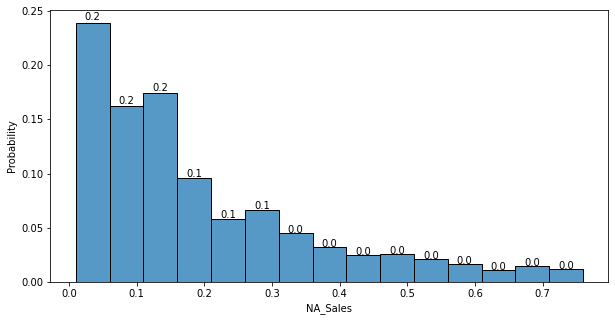

In [36]:
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(data=sales_df['NA_Sales'], bins = 15, stat='probability')
show_values(ax)

#Task II: Pairplots and Correlations

##A:Create seaborn pairplots of the data

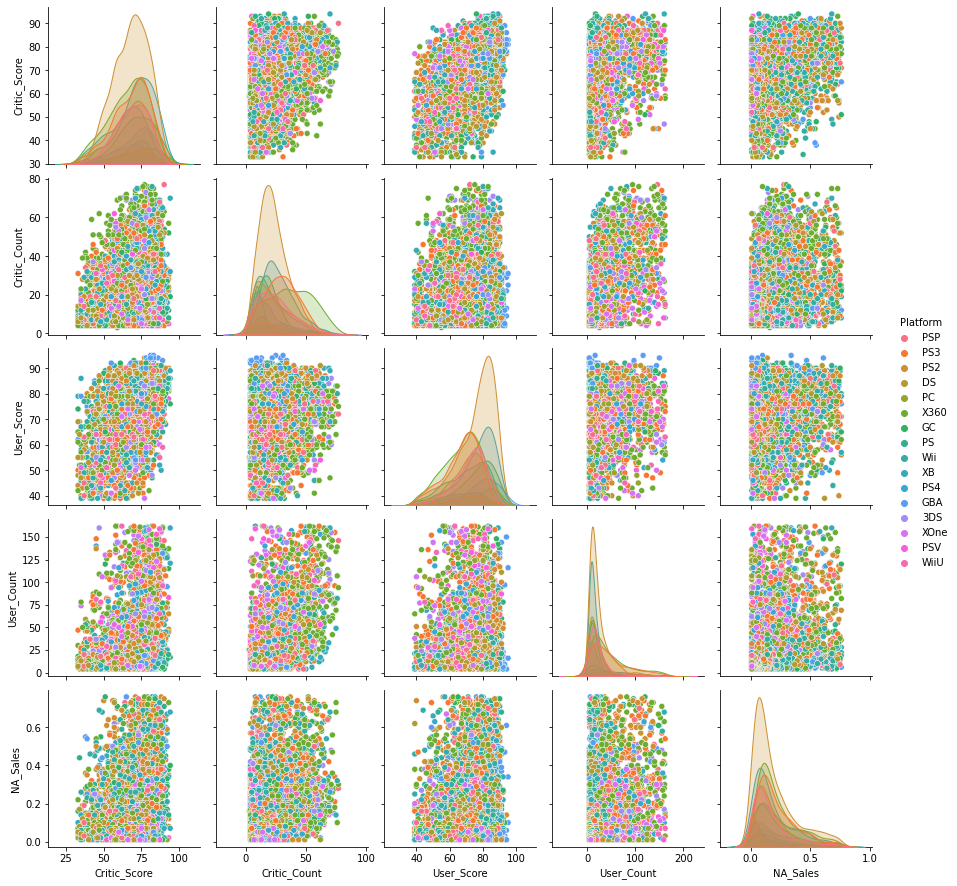

In [37]:
#With Platform Hue
sns.pairplot(data = sales_df, hue = 'Platform')

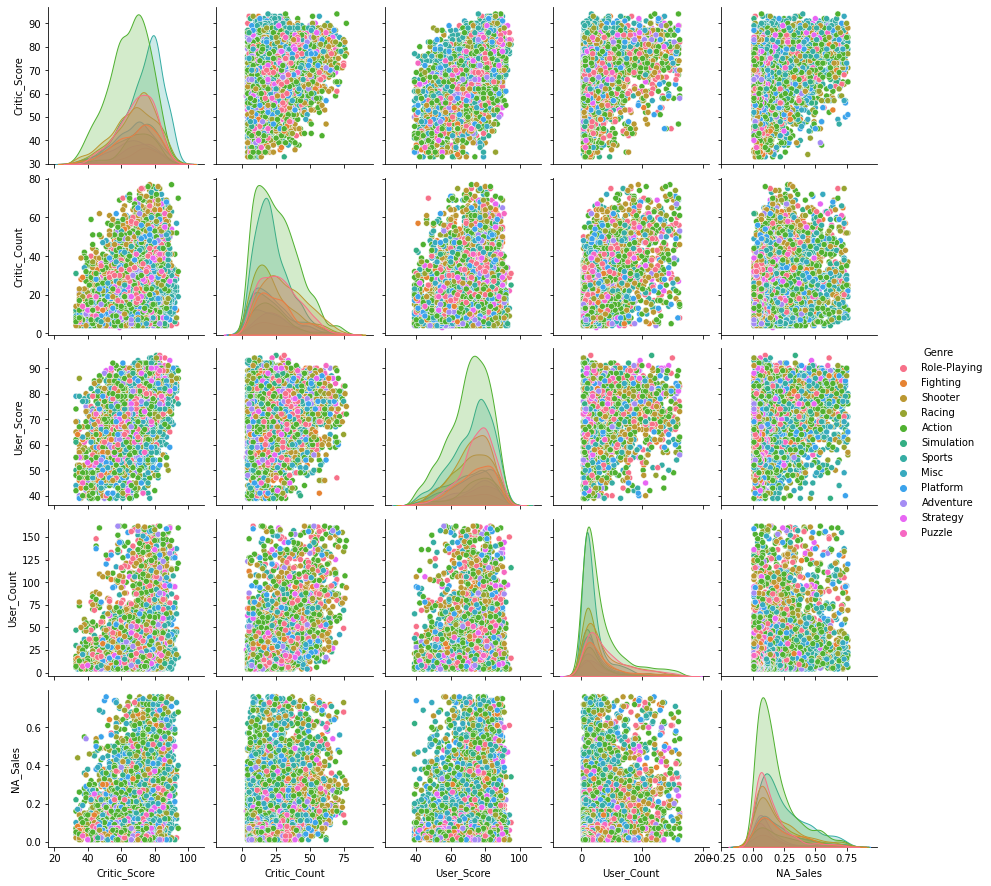

In [38]:
#With Genre Hue
sns.pairplot(data = sales_df, hue = 'Genre')

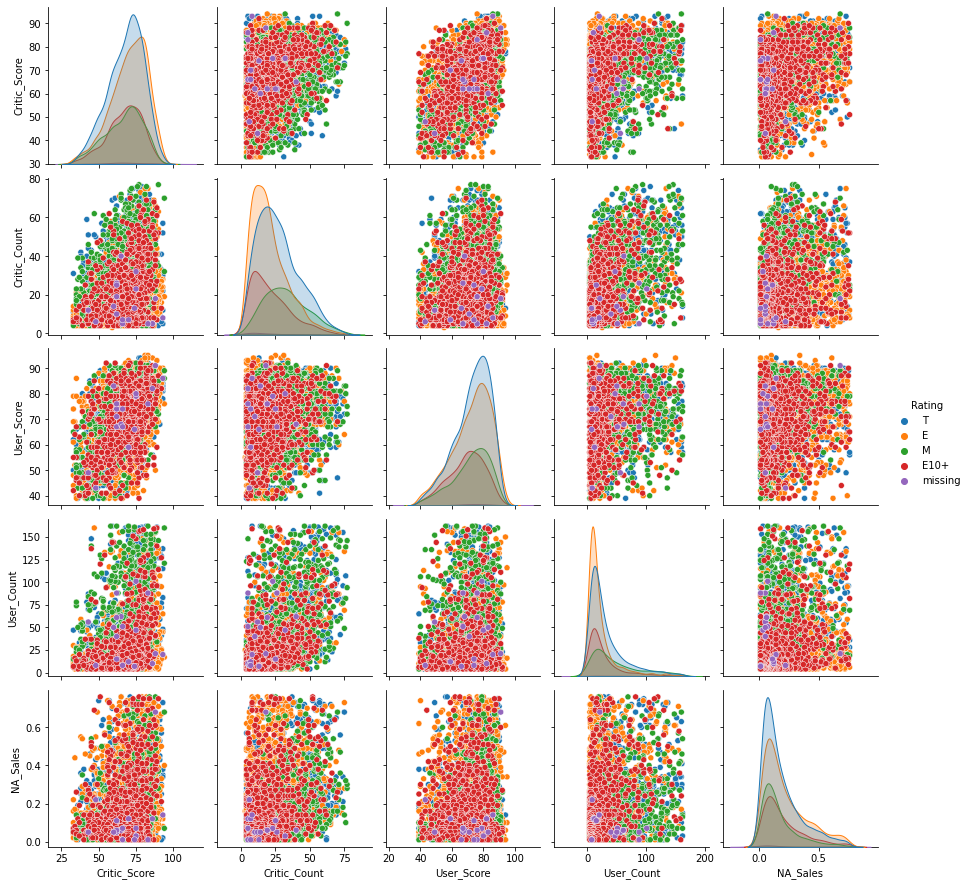

In [39]:
#With Rating Hue
sns.pairplot(data = sales_df, hue = 'Rating')

##B: Seaborn pairplot with the dependent variable as the hue.

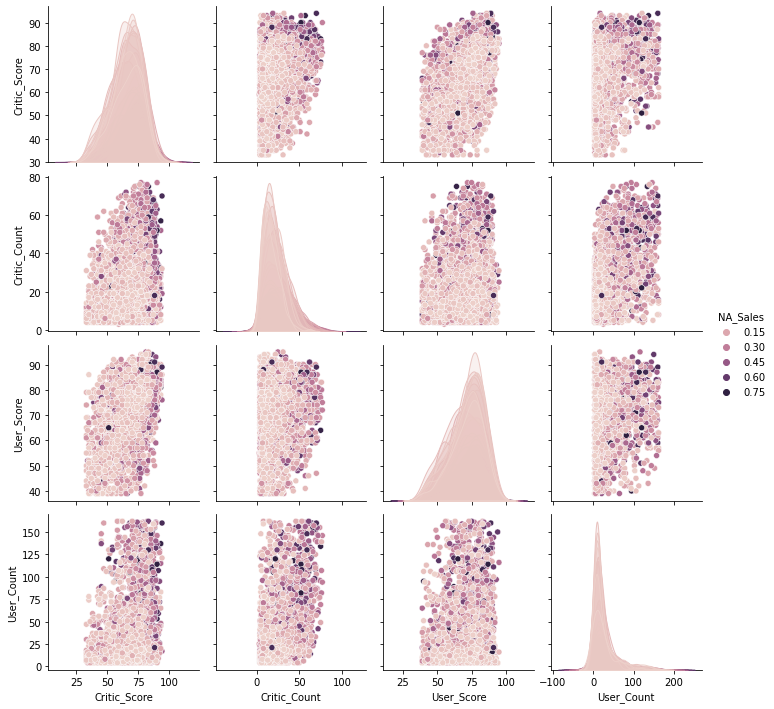

In [40]:
sns.pairplot(data = sales_df, hue = 'NA_Sales')

##C:One-hot encode categorical variables

In [41]:
#convert object variables to category
sales_df[sales_df.select_dtypes(include='object').columns] = sales_df[sales_df.select_dtypes(include='object').columns].astype('category')

In [42]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4698 entries, 13 to 6344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Platform      4698 non-null   category
 1   Genre         4698 non-null   category
 2   Rating        4698 non-null   category
 3   Critic_Score  4698 non-null   float64 
 4   Critic_Count  4698 non-null   float64 
 5   User_Score    4698 non-null   float64 
 6   User_Count    4698 non-null   float64 
 7   NA_Sales      4698 non-null   float64 
dtypes: category(3), float64(5)
memory usage: 235.2 KB


In [43]:
#One hot encode
sales_onehot_df = pd.get_dummies(sales_df,columns =['Platform', 'Genre', 'Rating'])

In [44]:
sales_onehot_df.shape

(4698, 38)

##D: Dataframe of correlations between all pairs of variables

In [45]:
correl_df = sales_onehot_df.corr()
correl_df

Critic_Score  Critic_Count  User_Score  User_Count  \
Critic_Score            1.000000      0.276208    0.524665    0.262897   
Critic_Count            0.276208      1.000000    0.123693    0.495794   
User_Score              0.524665      0.123693    1.000000    0.092924   
User_Count              0.262897      0.495794    0.092924    1.000000   
NA_Sales                0.266511      0.226521    0.093179    0.247162   
Platform_3DS           -0.032295      0.024718   -0.069690    0.069542   
Platform_DS            -0.032609     -0.053668   -0.019950   -0.088565   
Platform_GBA            0.039527     -0.133576    0.094618   -0.090742   
Platform_GC             0.059560     -0.091020    0.085028   -0.098703   
Platform_PC             0.020287     -0.063209   -0.034281    0.127182   
Platform_PS             0.048788     -0.152743    0.073111   -0.021208   
Platform_PS2           -0.019332     -0.064517    0.156893   -0.104053   
Platform_PS3           -0.001283      0.113943   -0.147238    0.174300   
Platform_PS4            0.029778      0.048416   -0.034573    0.138748   
Platform_PSP            0.001405     -0.001584    0.001507   -0.055217   
Platform_PSV            0.010915     -0.010942    0.012309    0.115198   
Platform_Wii           -0.102780     -0.073539   -0.052479   -0.083212   
Platform_WiiU           0.004960     -0.068932   -0.048591    0.091337   
Platform_X360          -0.075552      0.287599   -0.156748    0.178289   
Platform_XB             0.103196      0.061297    0.108784   -0.154405   
Platform_XOne           0.021865     -0.076541   -0.064568    0.114804   
Genre_Action           -0.155413      0.026507   -0.068306    0.047797   
Genre_Adventure        -0.054604     -0.026655    0.007481   -0.018806   
Genre_Fighting          0.005546      0.014652    0.022028    0.010634   
Genre_Misc             -0.003459     -0.033052   -0.053314   -0.057477   
Genre_Platform         -0.013368     -0.055755    0.007137   -0.022649   
Genre_Puzzle            0.031183      0.012347    0.001397   -0.050101   
Genre_Racing            0.001732     -0.033314   -0.020701   -0.049106   
Genre_Role-Playing      0.020385      0.057967    0.075461    0.132101   
Genre_Shooter          -0.032457      0.133230   -0.004406    0.084347   
Genre_Simulation        0.023537     -0.041493    0.037588   -0.032894   
Genre_Sports            0.190470     -0.080660    0.007917   -0.105360   
Genre_Strategy          0.027185     -0.006590    0.046132    0.003422   
Rating_E                0.107299     -0.194623    0.026943   -0.189137   
Rating_E10+            -0.040859     -0.091218   -0.106307   -0.037175   
Rating_M               -0.065857      0.215044   -0.006374    0.227772   
Rating_T               -0.025706      0.101956    0.057080    0.039551   
Rating_missing          0.002859     -0.039973   -0.001433    0.020714   

                    NA_Sales  Platform_3DS  Platform_DS  Platform_GBA  \
Critic_Score        0.266511     -0.032295    -0.032609      0.039527   
Critic_Count        0.226521      0.024718    -0.053668     -0.133576   
User_Score          0.093179     -0.069690    -0.019950      0.094618   
User_Count          0.247162      0.069542    -0.088565     -0.090742   
NA_Sales            1.000000     -0.018557    -0.020251      0.008567   
Platform_3DS       -0.018557      1.000000    -0.046103     -0.033104   
Platform_DS        -0.020251     -0.046103     1.000000     -0.061925   
Platform_GBA        0.008567     -0.033104    -0.061925      1.000000   
Platform_GC         0.017620     -0.041799    -0.078191     -0.056144   
Platform_PC        -0.114321     -0.020131    -0.037658     -0.027039   
Platform_PS         0.011629     -0.024308    -0.045472     -0.032651   
Platform_PS2       -0.007503     -0.077679    -0.145310     -0.104337   
Platform_PS3        0.054759     -0.054361    -0.101690     -0.073017   
Platform_PS4       -0.086470     -0.022914    -0.042864     -0.030778   
Platform_PSP       -0.036278     -0.04

##E: Seaborn heatmap of the correlation

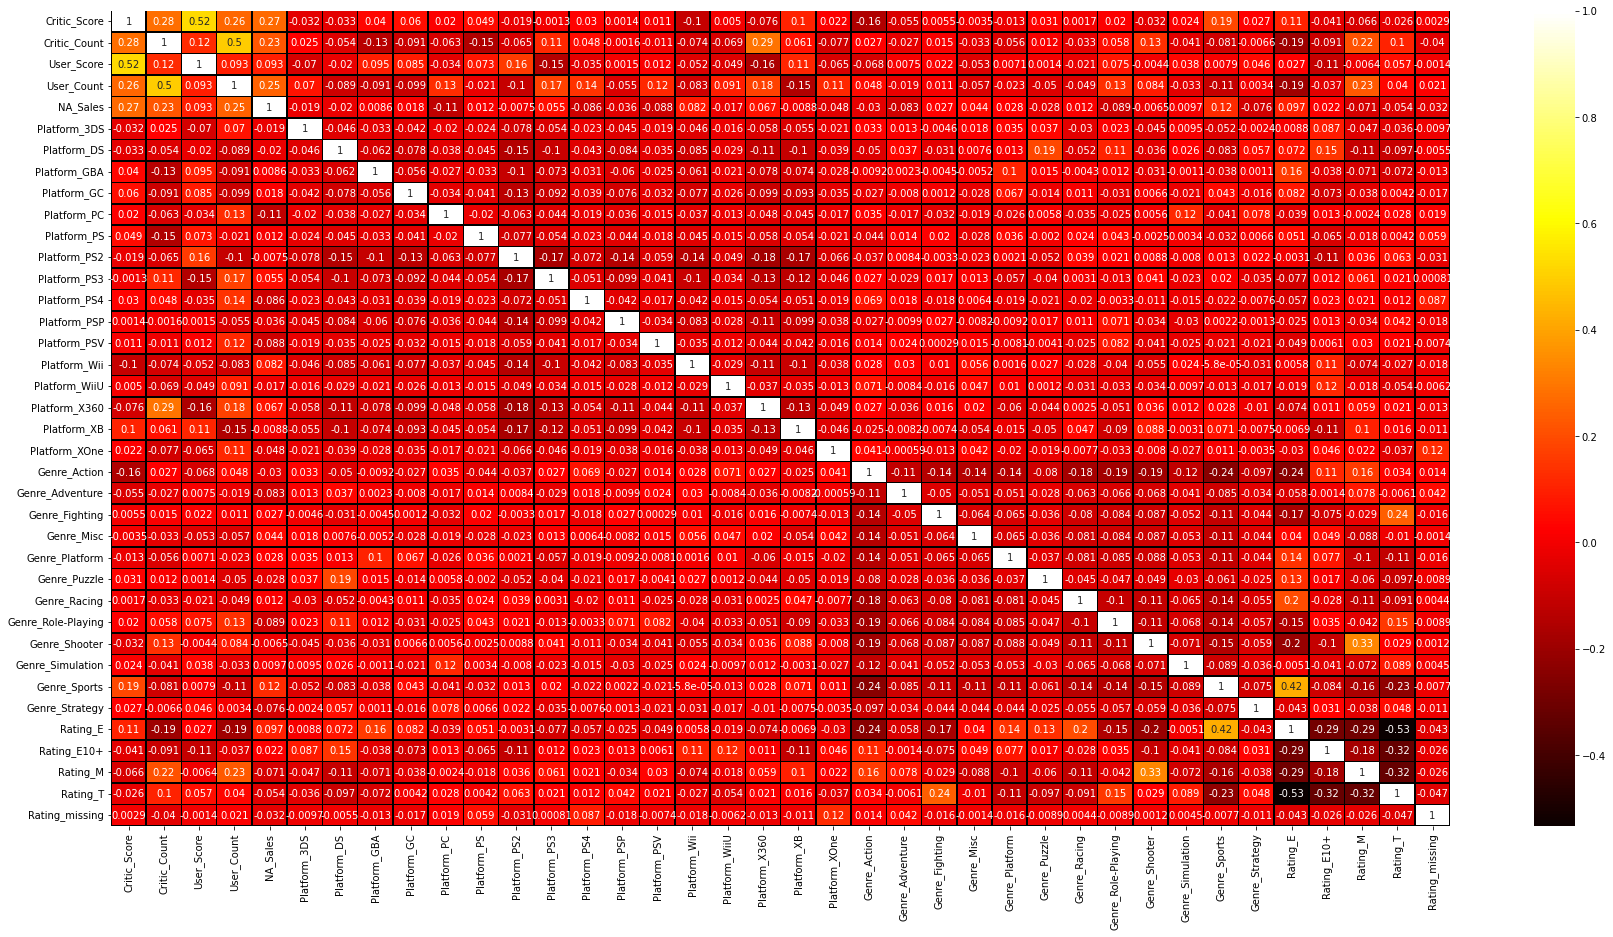

In [46]:
fig = plt.figure(figsize=(30,15))
ax = sns.heatmap(data=correl_df, annot=True, linecolor='black', linewidths=0.5, vmax=1.0, cmap='hot')
plt.show()

In [47]:
correl_df.abs().min().sort_values()

Genre_Sports          0.000058
Platform_Wii          0.000058
Genre_Fighting        0.000292
Platform_PSV          0.000292
Genre_Adventure       0.000591
Platform_XOne         0.000591
Rating_missing        0.000811
Platform_PS3          0.000811
Genre_Strategy        0.001051
Platform_GBA          0.001051
Genre_Simulation      0.001149
Platform_GC           0.001197
Genre_Puzzle          0.001229
Platform_WiiU         0.001229
Genre_Shooter         0.001249
Platform_PSP          0.001272
Critic_Score          0.001283
Genre_Misc            0.001380
User_Score            0.001397
Rating_E10+           0.001398
Genre_Platform        0.001550
Critic_Count          0.001584
Genre_Racing          0.001732
Platform_PS           0.002020
Platform_PS2          0.002143
Platform_PC           0.002363
Rating_M              0.002363
Platform_3DS          0.002438
Platform_X360         0.002497
Rating_E              0.003069
Platform_XB           0.003141
Platform_PS4          0.003289
Genre_Ro

## F

          (1) strongest positive correlation.
          User_Score and Critic_Score 0.52

          (2) strongest negative correlation.
          Rating_T and Rating_E -0.53

          (3) least correlation.
          Genre_Sports and Platform_Wii 0.000058


## G

          (1) an independent variable most likely to affect the results of a regression model.
          Critic_Score

          (2) two pairs of variables that are collinear.
          User_Score and Critic_Score
          Critic_Count and User_Count

#Task III: Train/Test Split and Dependent Variable Analysis

##A: Partition the dataset 

In [48]:
train_df, test_df = train_test_split(sales_onehot_df, test_size=0.3, random_state=random_state)

##B: Overall summary

In [49]:
#Training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3288 entries, 3485 to 3558
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Critic_Score        3288 non-null   float64
 1   Critic_Count        3288 non-null   float64
 2   User_Score          3288 non-null   float64
 3   User_Count          3288 non-null   float64
 4   NA_Sales            3288 non-null   float64
 5   Platform_3DS        3288 non-null   uint8  
 6   Platform_DS         3288 non-null   uint8  
 7   Platform_GBA        3288 non-null   uint8  
 8   Platform_GC         3288 non-null   uint8  
 9   Platform_PC         3288 non-null   uint8  
 10  Platform_PS         3288 non-null   uint8  
 11  Platform_PS2        3288 non-null   uint8  
 12  Platform_PS3        3288 non-null   uint8  
 13  Platform_PS4        3288 non-null   uint8  
 14  Platform_PSP        3288 non-null   uint8  
 15  Platform_PSV        3288 non-null   uint8  
 16  Pla

In [50]:
train_df.describe(include='all')

Critic_Score  Critic_Count   User_Score   User_Count     NA_Sales  \
count   3288.000000   3288.000000  3288.000000  3288.000000  3288.000000   
mean      68.346107     24.911192    71.907847    29.858273     0.195271   
std       12.181421     15.045798    11.767511    32.011340     0.172210   
min       33.000000      3.000000    39.000000     4.000000     0.010000   
25%       60.000000     13.000000    64.000000     8.000000     0.070000   
50%       70.000000     22.000000    74.000000    17.000000     0.140000   
75%       78.000000     34.000000    81.000000    37.000000     0.270000   
max       94.000000     77.000000    95.000000   162.000000     0.760000   

       Platform_3DS  Platform_DS  Platform_GBA  Platform_GC  Platform_PC  ...  \
count   3288.000000  3288.000000   3288.000000  3288.000000  3288.000000  ...   
mean       0.024939     0.077859      0.042883     0.066910     0.014599  ...   
std        0.155963     0.267990      0.202625     0.249904     0.119957  ...   
min        0.000000     0.000000      0.000000     0.000000     0.000000  ...   
25%        0.000000     0.000000      0.000000     0.000000     0.000000  ...   
50%        0.000000     0.000000      0.000000     0.000000     0.000000  ...   
75%        0.000000     0.000000      0.000000     0.000000     0.000000  ...   
max        1.000000     1.000000      1.000000     1.000000     1.000000  ...   

       Genre_Role-Playing  Genre_Shooter  Genre_Simulation  Genre_Sports  \
count         3288.000000    3288.000000       3288.000000   3288.000000   
mean             0.095803       0.106144          0.039538      0.161496   
std              0.294366       0.308068          0.194900      0.368044   
min              0.000000       0.000000          0.000000      0.000000   
25%              0.000000       0.000000          0.000000      0.000000   
50%              0.000000       0.000000          0.000000      0.000000   
75%              0.000000       0.000000          0.000000      0.000000   
max              1.000000       1.000000          1.000000      1.000000   

       Genre_Strategy     Rating_E  Rating_E10+     Rating_M     Rating_T  \
count     3288.000000  3288.000000  3288.000000  3288.000000  3288.000000   
mean         0.028285     0.322080     0.156934     0.149027     0.368309   
std          0.165810     0.467345     0.363794     0.356169     0.482419   
min          0.000000     0.000000     0.000000     0.000000     0.000000   
25%          0.000000     0.000000     0.000000     0.000000     0.000000   
50%          0.000000     0.000000     0.000000     0.000000     0.000000   
75%          0.000000     1.000000     0.000000     0.000000     1.000000   
max          1.000000     1.000000     1.000000     1.000000     1.000000   

       Rating_missing  
count     3288.000000  
mean         0.003650  
std          0.060311  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  

[8 rows x 38 columns]

In [51]:
#Testing dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410 entries, 1833 to 969
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Critic_Score        1410 non-null   float64
 1   Critic_Count        1410 non-null   float64
 2   User_Score          1410 non-null   float64
 3   User_Count          1410 non-null   float64
 4   NA_Sales            1410 non-null   float64
 5   Platform_3DS        1410 non-null   uint8  
 6   Platform_DS         1410 non-null   uint8  
 7   Platform_GBA        1410 non-null   uint8  
 8   Platform_GC         1410 non-null   uint8  
 9   Platform_PC         1410 non-null   uint8  
 10  Platform_PS         1410 non-null   uint8  
 11  Platform_PS2        1410 non-null   uint8  
 12  Platform_PS3        1410 non-null   uint8  
 13  Platform_PS4        1410 non-null   uint8  
 14  Platform_PSP        1410 non-null   uint8  
 15  Platform_PSV        1410 non-null   uint8  
 16  Plat

In [52]:
test_df.describe(include='all')

Critic_Score  Critic_Count   User_Score   User_Count     NA_Sales  \
count   1410.000000   1410.000000  1410.000000  1410.000000  1410.000000   
mean      68.290071     25.221986    72.188652    31.849645     0.190411   
std       12.052298     15.203505    11.493814    34.338979     0.167389   
min       33.000000      4.000000    39.000000     4.000000     0.010000   
25%       60.000000     13.000000    65.250000     9.000000     0.070000   
50%       70.000000     22.000000    74.000000    18.000000     0.130000   
75%       77.750000     34.000000    81.000000    40.000000     0.270000   
max       94.000000     76.000000    94.000000   162.000000     0.760000   

       Platform_3DS  Platform_DS  Platform_GBA  Platform_GC  Platform_PC  ...  \
count   1410.000000  1410.000000   1410.000000  1410.000000  1410.000000  ...   
mean       0.021986     0.082979      0.041844     0.064539     0.019858  ...   
std        0.146689     0.275948      0.200304     0.245798     0.139562  ...   
min        0.000000     0.000000      0.000000     0.000000     0.000000  ...   
25%        0.000000     0.000000      0.000000     0.000000     0.000000  ...   
50%        0.000000     0.000000      0.000000     0.000000     0.000000  ...   
75%        0.000000     0.000000      0.000000     0.000000     0.000000  ...   
max        1.000000     1.000000      1.000000     1.000000     1.000000  ...   

       Genre_Role-Playing  Genre_Shooter  Genre_Simulation  Genre_Sports  \
count         1410.000000    1410.000000       1410.000000   1410.000000   
mean             0.104965       0.102128          0.044681      0.143972   
std              0.306616       0.302924          0.206676      0.351186   
min              0.000000       0.000000          0.000000      0.000000   
25%              0.000000       0.000000          0.000000      0.000000   
50%              0.000000       0.000000          0.000000      0.000000   
75%              0.000000       0.000000          0.000000      0.000000   
max              1.000000       1.000000          1.000000      1.000000   

       Genre_Strategy     Rating_E  Rating_E10+     Rating_M     Rating_T  \
count     1410.000000  1410.000000  1410.000000  1410.000000  1410.000000   
mean         0.031206     0.340426     0.129078     0.156738     0.369504   
std          0.173935     0.474020     0.335405     0.363682     0.482842   
min          0.000000     0.000000     0.000000     0.000000     0.000000   
25%          0.000000     0.000000     0.000000     0.000000     0.000000   
50%          0.000000     0.000000     0.000000     0.000000     0.000000   
75%          0.000000     1.000000     0.000000     0.000000     1.000000   
max          1.000000     1.000000     1.000000     1.000000     1.000000   

       Rating_missing  
count     1410.000000  
mean         0.004255  
std          0.065117  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  

[8 rows x 38 columns]

##C:Normalized histograms 

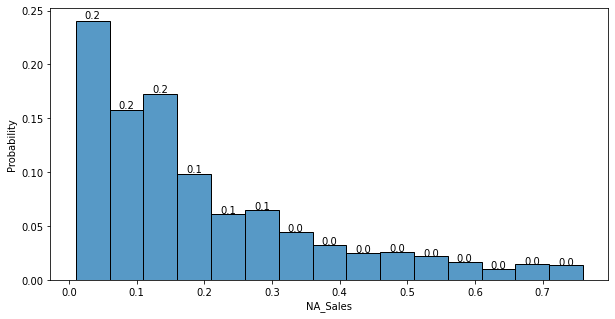

In [53]:
#testing set
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(data=train_df['NA_Sales'], bins = 15, stat='probability')
show_values(ax)

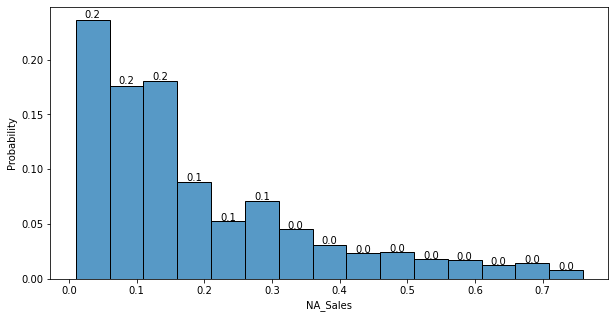

In [54]:
#training set
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(data=test_df['NA_Sales'], bins = 15, stat='probability')
show_values(ax)

##D: Compare histograms

The distributions of NA_Sales in the training and testing set are the same with the distributions of NA_Sales in the entire dataset, because of random splitting. 

#Task IV: Simple and Multivariate Regression

In [55]:
#list of all variables
variable_list = list(set(list(train_df.columns)+list(test_df.columns)))
print("All Variables: "+str(variable_list))

All Variables: ['Platform_GC', 'Genre_Adventure', 'Genre_Role-Playing', 'Platform_PSP', 'Genre_Platform', 'Rating_missing', 'Platform_PS2', 'Platform_XOne', 'Platform_WiiU', 'Rating_T', 'Platform_PSV', 'User_Score', 'Platform_PC', 'Genre_Puzzle', 'Rating_E10+', 'Platform_PS3', 'Genre_Shooter', 'Genre_Sports', 'User_Count', 'Critic_Count', 'Platform_GBA', 'NA_Sales', 'Genre_Misc', 'Critic_Score', 'Platform_DS', 'Rating_M', 'Platform_PS', 'Platform_3DS', 'Genre_Action', 'Platform_X360', 'Genre_Racing', 'Platform_XB', 'Genre_Simulation', 'Genre_Strategy', 'Rating_E', 'Platform_Wii', 'Platform_PS4', 'Genre_Fighting']


In [56]:
#independent variable seperation
sales_index = variable_list.index('NA_Sales')
dependent_variable_list = [variable_list.pop(sales_index)]
print("Dependent Variable: "+str(dependent_variable_list))
independent_variable_list = sorted(variable_list)
print("Independent Variables: "+str(independent_variable_list))

Dependent Variable: ['NA_Sales']
Independent Variables: ['Critic_Count', 'Critic_Score', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Platform_3DS', 'Platform_DS', 'Platform_GBA', 'Platform_GC', 'Platform_PC', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_XOne', 'Rating_E', 'Rating_E10+', 'Rating_M', 'Rating_T', 'Rating_missing', 'User_Count', 'User_Score']


In [57]:
#independent variable seperation of training and testing set
X_train = train_df[independent_variable_list].to_numpy()
print("Training Independent Data Shape: "+str(X_train.shape))
y_train_ground_truth = train_df[dependent_variable_list].to_numpy().reshape(-1)
print("Training Dependent Data Shape: "+str(y_train_ground_truth.shape))
print("Training Data Set Shape: "+str(train_df.shape))
print("\n")
X_test = test_df[independent_variable_list].to_numpy()
print("Testing Independent Data Shape: "+str(X_test.shape))
y_test_ground_truth = test_df[dependent_variable_list].to_numpy().reshape(-1)
print("Testing Dependent Data Shape: "+str(y_test_ground_truth.shape))
print("Testing Data Set Shape: "+str(test_df.shape))
print("\n")
X = sales_onehot_df[independent_variable_list].to_numpy()
print("Original Independent Data Shape: "+str(X.shape))
y_ground_truth = sales_onehot_df[dependent_variable_list].to_numpy().reshape(-1)
print("Original Dependent Data Shape: "+str(y_ground_truth.shape))
print("Original Data Set Shape: "+str(sales_onehot_df.shape))

Training Independent Data Shape: (3288, 37)
Training Dependent Data Shape: (3288,)
Training Data Set Shape: (3288, 38)


Testing Independent Data Shape: (1410, 37)
Testing Dependent Data Shape: (1410,)
Testing Data Set Shape: (1410, 38)


Original Independent Data Shape: (4698, 37)
Original Dependent Data Shape: (4698,)
Original Data Set Shape: (4698, 38)


## Critic_Count Variable

In [58]:
#A:Train a simple regression model
lin_reg_critic_count = LinearRegression().fit(X_train[:,0].reshape(-1,1), y_train_ground_truth)

In [59]:
#B:Predict
critic_count_pred = lin_reg_critic_count.predict(X_test[:,0].reshape(-1,1))

In [60]:
#C:Metrics
#Slope Coefficient
print(str(lin_reg_critic_count.coef_[0].round(5)))
#Intercept Coefficient
print(str(lin_reg_critic_count.intercept_.round(5)))
#Training Coefficient of Determination
print(str(lin_reg_critic_count.score(X_train[:,0].reshape(-1,1),y_train_ground_truth).round(5)))
#MAE
print(str(mean_absolute_error(y_test_ground_truth, critic_count_pred).round(5)))
#MSE
print(str(mean_squared_error(y_test_ground_truth, critic_count_pred).round(5)))
#Testing Coefficent of Determination
print(str(r2_score(y_test_ground_truth,critic_count_pred).round(5)))

0.00276
0.12657
0.05806
0.12912
0.02708
0.0327


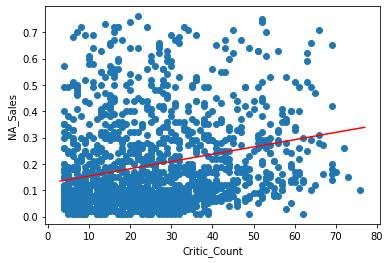

In [61]:
#D:Plot the model
testing_instances = critic_count_pred.shape[0]
critic_count_data = np.zeros(shape=(testing_instances,2))
critic_count_data[:,0] = X_test[:,0]
critic_count_data[:,1] = y_test_ground_truth
critic_count_xvalues = np.arange(sales_onehot_df['Critic_Count'].min(),sales_onehot_df['Critic_Count'].max(),.001)
critic_count_model_line = lin_reg_critic_count.coef_[0] * critic_count_xvalues + lin_reg_critic_count.intercept_
plt.scatter(critic_count_data[:,0],critic_count_data[:,1])
plt.plot(critic_count_xvalues,critic_count_model_line,c= "red",linestyle='-')
plt.xlabel("Critic_Count")
plt.ylabel("NA_Sales")
plt.show()

In [62]:
#E:Calculate P-value
slope, intercept, r_value, p_value, std_err = stats.linregress(X_test[:,0],y_test_ground_truth)
print("p-Value from SciPy: "+str(p_value))

p-Value from SciPy: 2.801622402430958e-13


The model is statistically significant 

## Critic_Score Variable

In [63]:
#A:Train a simple regression model
lin_reg_critic_score = LinearRegression().fit(X_train[:,1].reshape(-1,1), y_train_ground_truth)

In [64]:
#B:Predict
critic_score_pred = lin_reg_critic_score.predict(X_test[:,1].reshape(-1,1))

In [65]:
#C:Metrics
#Slope Coefficient
print(str(lin_reg_critic_score.coef_[0].round(5)))
#Intercept Coefficient
print(str(lin_reg_critic_score.intercept_.round(5)))
#Training Coefficient of Determination
print(str(lin_reg_critic_score.score(X_train[:,1].reshape(-1,1),y_train_ground_truth).round(5)))
#MAE
print(str(mean_absolute_error(y_test_ground_truth, critic_score_pred).round(5)))
#MSE
print(str(mean_squared_error(y_test_ground_truth, critic_score_pred).round(5)))
#Testing Coefficent of Determination
print(str(r2_score(y_test_ground_truth,critic_score_pred).round(5)))

0.00404
-0.08071
0.08159
0.12802
0.0268
0.04271


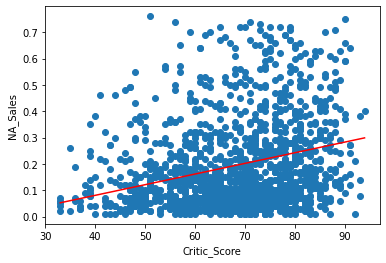

In [66]:
#D:Plot the model
testing_instances = critic_score_pred.shape[0]
critic_score_data = np.zeros(shape=(testing_instances,2))
critic_score_data[:,0] = X_test[:,1]
critic_score_data[:,1] = y_test_ground_truth
critic_score_xvalues = np.arange(sales_onehot_df['Critic_Score'].min(),sales_onehot_df['Critic_Score'].max(),.001)
critic_score_model_line = lin_reg_critic_score.coef_[0] * critic_score_xvalues + lin_reg_critic_score.intercept_
plt.scatter(critic_score_data[:,0],critic_score_data[:,1])
plt.plot(critic_score_xvalues,critic_score_model_line,c= "red",linestyle='-')
plt.xlabel("Critic_Score")
plt.ylabel("NA_Sales")
plt.show()

In [67]:
#E:Calculate P-value
slope, intercept, r_value, p_value, std_err = stats.linregress(X_test[:,1],y_test_ground_truth)
print("p-Value from SciPy: "+str(p_value))

p-Value from SciPy: 6.172997707987892e-17


The model is statistically significant 

## User_Count Variable

In [68]:
#A:Train a simple regression model
lin_reg_user_count = LinearRegression().fit(X_train[:,-2].reshape(-1,1), y_train_ground_truth)

In [69]:
#B:Predict
user_count_pred = lin_reg_user_count.predict(X_test[:,-2].reshape(-1,1))

In [70]:
#C:Metrics
#Slope Coefficient
print(str(lin_reg_user_count.coef_[0].round(5)))
#Intercept Coefficient
print(str(lin_reg_user_count.intercept_.round(5)))
#Training Coefficient of Determination
print(str(lin_reg_user_count.score(X_train[:,-2].reshape(-1,1),y_train_ground_truth).round(5)))
#MAE
print(str(mean_absolute_error(y_test_ground_truth, user_count_pred).round(5)))
#MSE
print(str(mean_squared_error(y_test_ground_truth, user_count_pred).round(5)))
#Testing Coefficent of Determination
print(str(r2_score(y_test_ground_truth,user_count_pred).round(5)))

0.00138
0.15417
0.06547
0.12778
0.02665
0.04812


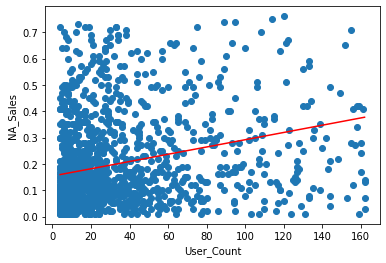

In [71]:
#D:Plot the model
testing_instances = user_count_pred.shape[0]
user_count_data = np.zeros(shape=(testing_instances,2))
user_count_data[:,0] = X_test[:,-2]
user_count_data[:,1] = y_test_ground_truth
user_count_xvalues = np.arange(sales_onehot_df['User_Count'].min(),sales_onehot_df['User_Count'].max(),.001)
user_count_model_line = lin_reg_user_count.coef_[0] * user_count_xvalues + lin_reg_user_count.intercept_
plt.scatter(user_count_data[:,0],user_count_data[:,1])
plt.plot(user_count_xvalues,user_count_model_line,c= "red",linestyle='-')
plt.xlabel("User_Count")
plt.ylabel("NA_Sales")
plt.show()

In [72]:
#E:Calculate P-value
slope, intercept, r_value, p_value, std_err = stats.linregress(X_test[:,-2],y_test_ground_truth)
print("p-Value from SciPy: "+str(p_value))

p-Value from SciPy: 2.1689811057903953e-18


The model is statistically significant 


##User_Score Variable

In [73]:
#A:Train a simple regression model
lin_reg_user_score = LinearRegression().fit(X_train[:,-1].reshape(-1,1), y_train_ground_truth)

In [74]:
#B:Predict
user_score_pred = lin_reg_user_score.predict(X_test[:,-1].reshape(-1,1))

In [75]:
#C:Metrics
#Slope Coefficient
print(str(lin_reg_user_score.coef_[0].round(5)))
#Intercept Coefficient
print(str(lin_reg_user_score.intercept_.round(5)))
#Training Coefficient of Determination
print(str(lin_reg_user_score.score(X_train[:,-1].reshape(-1,1),y_train_ground_truth).round(5)))
#MAE
print(str(mean_absolute_error(y_test_ground_truth, user_score_pred).round(5)))
#MSE
print(str(mean_squared_error(y_test_ground_truth, user_score_pred).round(5)))
#Testing Coefficent of Determination
print(str(r2_score(y_test_ground_truth,user_score_pred).round(5)))

0.00126
0.10446
0.00745
0.13162
0.0277
0.0107


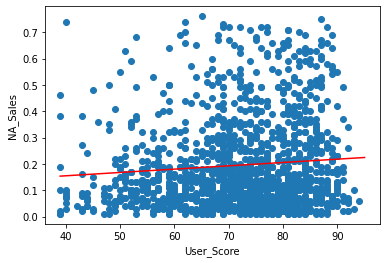

In [76]:
#D:Plot the model
testing_instances = user_score_pred.shape[0]
user_score_data = np.zeros(shape=(testing_instances,2))
user_score_data[:,0] = X_test[:,-1]
user_score_data[:,1] = y_test_ground_truth
user_score_xvalues = np.arange(sales_onehot_df['User_Score'].min(),sales_onehot_df['User_Score'].max(),.001)
user_score_model_line = lin_reg_user_score.coef_[0] * user_score_xvalues + lin_reg_user_score.intercept_
plt.scatter(user_score_data[:,0],user_score_data[:,1])
plt.plot(user_score_xvalues,user_score_model_line,c= "red",linestyle='-')
plt.xlabel("User_Score")
plt.ylabel("NA_Sales")
plt.show()

In [77]:
#E:Calculate P-value
slope, intercept, r_value, p_value, std_err = stats.linregress(X_test[:,-1],y_test_ground_truth)
print("p-Value from SciPy: "+str(p_value))

p-Value from SciPy: 3.1371947439977426e-05


The model is statistically significant 

##F: Multivariate linear regression

In [78]:
#train
lin_reg_full = LinearRegression().fit(X_train,y_train_ground_truth)

In [79]:
#predict
lin_reg_full_pred = lin_reg_full.predict(X_test)

In [80]:
#Slope Coefficient
pd.DataFrame({'Feature':independent_variable_list,'Slope Coefficient':lin_reg_full.coef_})


Feature  Slope Coefficient
0         Critic_Count           0.001052
1         Critic_Score           0.003065
2         Genre_Action           0.018995
3      Genre_Adventure          -0.034765
4       Genre_Fighting           0.032973
5           Genre_Misc           0.053932
6       Genre_Platform           0.014379
7         Genre_Puzzle          -0.038236
8         Genre_Racing          -0.001939
9   Genre_Role-Playing          -0.057757
10       Genre_Shooter           0.012607
11    Genre_Simulation           0.031016
12        Genre_Sports           0.034533
13      Genre_Strategy          -0.065737
14        Platform_3DS          -0.009479
15         Platform_DS           0.055699
16        Platform_GBA           0.061317
17         Platform_GC           0.075852
18         Platform_PC          -0.180350
19         Platform_PS           0.083891
20        Platform_PS2           0.059816
21        Platform_PS3           0.026412
22        Platform_PS4          -0.128926
23        Platform_PSP           0.033072
24        Platform_PSV          -0.121441
25        Platform_Wii           0.093548
26       Platform_WiiU          -0.061292
27       Platform_X360           0.032521
28         Platform_XB           0.057862
29       Platform_XOne          -0.078502
30            Rating_E           0.024468
31         Rating_E10+           0.029137
32            Rating_M          -0.045602
33            Rating_T          -0.009048
34      Rating_missing           0.001045
35          User_Count           0.001690
36          User_Score          -0.001286

In [81]:
# Other Metrics

#Intercept Coefficient
print("Intercept: "+str(lin_reg_full.intercept_.round(5)))

#Training Coefficient of Determination
print("Training Coefficient of Determination (R-Squared): "+str(lin_reg_full.score(X_train,y_train_ground_truth).round(5)))

# MAE
print("Mean Absolute Error: "+str(mean_absolute_error(y_test_ground_truth,lin_reg_full_pred).round(5)))

# MSE
print("Mean Squared Error: "+str(mean_squared_error(y_test_ground_truth,lin_reg_full_pred).round(5)))

#Testing Coefficent of Determination
print("Testing Coefficient of Determination (R-Squared): "+str(r2_score(y_test_ground_truth,lin_reg_full_pred).round(5)))

Intercept: -0.04913
Training Coefficient of Determination (R-Squared): 0.25275
Mean Absolute Error: 0.11447
Mean Squared Error: 0.02214
Testing Coefficient of Determination (R-Squared): 0.20912


In [82]:
#Calculate P-value
X2 = sm.add_constant(X_test)
estimator = sm.OLS(y_test_ground_truth,X2)
print("p-Value from StatsModels: "+str(estimator.fit().f_pvalue))

p-Value from StatsModels: 8.478362604399974e-60


This model is statistically significant

##Platform_PS Variable

In [83]:
platform_ps_index = independent_variable_list.index('Platform_PS')

In [84]:
#A:Train a simple regression model
lin_reg_platform_ps = LinearRegression().fit(X_train[:,platform_ps_index].reshape(-1,1), y_train_ground_truth)

In [85]:
#B:Predict
platform_ps_pred = lin_reg_platform_ps.predict(X_test[:,platform_ps_index].reshape(-1,1))

In [86]:
#C:Metrics
#Slope Coefficient
print(str(lin_reg_platform_ps.coef_[0].round(5)))
#Intercept Coefficient
print(str(lin_reg_platform_ps.intercept_.round(5)))
#Training Coefficient of Determination
print(str(lin_reg_platform_ps.score(X_train[:,platform_ps_index].reshape(-1,1),y_train_ground_truth).round(5)))
#MAE
print(str(mean_absolute_error(y_test_ground_truth, platform_ps_pred).round(5)))
#MSE
print(str(mean_squared_error(y_test_ground_truth, platform_ps_pred).round(5)))
#Testing Coefficent of Determination
print(str(r2_score(y_test_ground_truth,platform_ps_pred).round(5)))

0.01149
0.195
0.0001
0.13269
0.02802
-0.00063


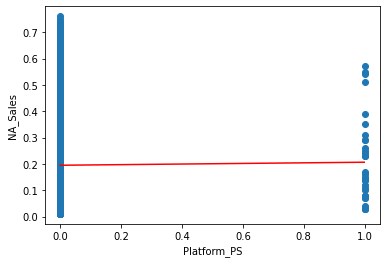

In [87]:
#D:Plot the model
testing_instances = platform_ps_pred.shape[0]
platform_ps_data = np.zeros(shape=(testing_instances,2))
platform_ps_data[:,0] = X_test[:,platform_ps_index]
platform_ps_data[:,1] = y_test_ground_truth
platform_ps_xvalues = np.arange(sales_onehot_df['Platform_PS'].min(),sales_onehot_df['Platform_PS'].max(),.001)
platform_ps_model_line = lin_reg_platform_ps.coef_[0] * platform_ps_xvalues + lin_reg_platform_ps.intercept_
plt.scatter(platform_ps_data[:,0],platform_ps_data[:,1])
plt.plot(platform_ps_xvalues,platform_ps_model_line,c= "red",linestyle='-')
plt.xlabel("Platform_PS")
plt.ylabel("NA_Sales")
plt.show()

In [88]:
#E:Calculate P-value
slope, intercept, r_value, p_value, std_err = stats.linregress(X_test[:,platform_ps_index],y_test_ground_truth)
print("p-Value from SciPy: "+str(p_value))

p-Value from SciPy: 0.5654563946225303


In [89]:
#Calculate P-valueusing Anova
test_statistic, p_value = f_regression(X_test[:,platform_ps_index].reshape(-1,1),y_test_ground_truth)

print(str('{:0.3e}'.format(p_value[0])))

5.655e-01


The model is not statistically significant 

#Task V: Nonlinear Regression

##A.an independent variable with nonlinear distribution

In [90]:
#User_count column
user_counts = sales_df['User_Count'].value_counts()
user_counts

6.0      250
4.0      242
5.0      241
8.0      225
7.0      205
        ... 
145.0      2
143.0      1
154.0      1
149.0      1
151.0      1
Name: User_Count, Length: 158, dtype: int64

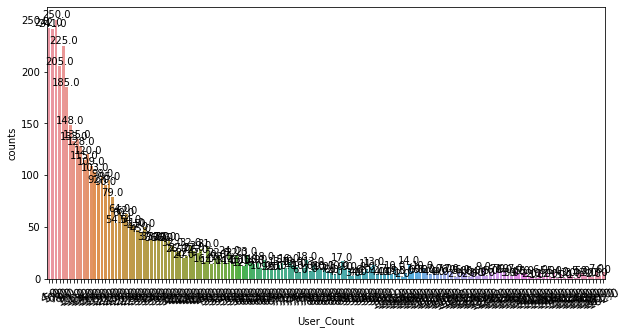

In [91]:
#plot User_count column
user_counts_df = user_counts.rename_axis('User_Count').reset_index(name='counts')
fig = plt.figure(figsize=(10,5))
ax = sns.barplot(x='User_Count',y='counts',data=user_counts_df)
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=25,size=12)
show_values(ax)

##B:linearize the variable

In [92]:
sales_onehot_df['log_user_count'] = np.log10(sales_onehot_df['User_Count'])

In [93]:
sales_onehot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4698 entries, 13 to 6344
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Critic_Score        4698 non-null   float64
 1   Critic_Count        4698 non-null   float64
 2   User_Score          4698 non-null   float64
 3   User_Count          4698 non-null   float64
 4   NA_Sales            4698 non-null   float64
 5   Platform_3DS        4698 non-null   uint8  
 6   Platform_DS         4698 non-null   uint8  
 7   Platform_GBA        4698 non-null   uint8  
 8   Platform_GC         4698 non-null   uint8  
 9   Platform_PC         4698 non-null   uint8  
 10  Platform_PS         4698 non-null   uint8  
 11  Platform_PS2        4698 non-null   uint8  
 12  Platform_PS3        4698 non-null   uint8  
 13  Platform_PS4        4698 non-null   uint8  
 14  Platform_PSP        4698 non-null   uint8  
 15  Platform_PSV        4698 non-null   uint8  
 16  Platf

#C: re-perform the train/test indpendent/dependent variable splits/separations

In [94]:
sales_onehot_df_train, sales_onehot_df_test, y_train_ground_truth, y_test_ground_truth = train_test_split(sales_onehot_df.drop('NA_Sales', axis = 1),
                                                                                                          sales_onehot_df['NA_Sales'],
                                                                                                          train_size=0.7,
                                                                                                          random_state = random_state)

##D:

In [95]:
#A:Train a simple regression model
lin_reg_log_user_count = LinearRegression().fit(sales_onehot_df_train.to_numpy()[:,37].reshape(-1,1), y_train_ground_truth)

In [96]:
#B:Predict
log_user_count_pred = lin_reg_log_user_count.predict(sales_onehot_df_test.to_numpy()[:,37].reshape(-1,1))

In [97]:
#C:Metrics
#Slope Coefficient
print(str(lin_reg_log_user_count.coef_[0].round(5)))
#Intercept Coefficient
print(str(lin_reg_log_user_count.intercept_.round(5)))
#Training Coefficient of Determination
print(str(lin_reg_log_user_count.score(sales_onehot_df_train.to_numpy()[:,37].reshape(-1,1),y_train_ground_truth).round(5)))
#MAE
print(str(mean_absolute_error(y_test_ground_truth, log_user_count_pred).round(5)))
#MSE
print(str(mean_squared_error(y_test_ground_truth, log_user_count_pred).round(5)))
#Testing Coefficent of Determination
print(str(r2_score(y_test_ground_truth,log_user_count_pred).round(5)))

0.11713
0.04638
0.0802
0.12593
0.02607
0.06894


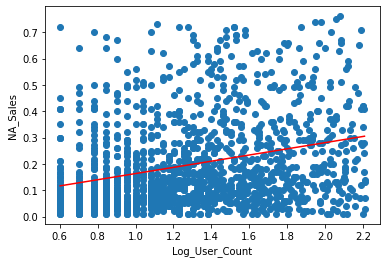

In [98]:
#D:Plot the model
testing_instances = log_user_count_pred.shape[0]
log_user_count_data = np.zeros(shape=(testing_instances,2))
log_user_count_data[:,0] = sales_onehot_df_test.to_numpy()[:,37]
log_user_count_data[:,1] = y_test_ground_truth
log_user_count_xvalues = np.arange(sales_onehot_df['log_user_count'].min(),sales_onehot_df['log_user_count'].max(),.001)
log_user_count_model_line = lin_reg_log_user_count.coef_[0] * log_user_count_xvalues + lin_reg_log_user_count.intercept_
plt.scatter(log_user_count_data[:,0],log_user_count_data[:,1])
plt.plot(log_user_count_xvalues,log_user_count_model_line,c= "red",linestyle='-')
plt.xlabel("Log_User_Count")
plt.ylabel("NA_Sales")
plt.show()

In [99]:
#E:Calculate P-value
slope, intercept, r_value, p_value, std_err = stats.linregress(sales_onehot_df_test.to_numpy()[:,37],y_test_ground_truth)
print("p-Value from SciPy: "+str(p_value))

p-Value from SciPy: 1.3761388124803078e-24


The model is statistically significant 


##E: Multivariate linear regression

In [100]:
#train
lin_reg_full_2 = LinearRegression().fit(sales_onehot_df_train,y_train_ground_truth)

In [101]:
#predict
lin_reg_full_pred_2 = lin_reg_full_2.predict(sales_onehot_df_test)

In [102]:
independent_variable_list = list(sales_onehot_df.columns)
independent_variable_list.remove('NA_Sales')

In [103]:
#Slope Coefficient
pd.DataFrame({'Feature':independent_variable_list,'Slope Coefficient':lin_reg_full_2.coef_})


Feature  Slope Coefficient
0         Critic_Score           0.002752
1         Critic_Count           0.000554
2           User_Score          -0.001587
3           User_Count           0.000226
4         Platform_3DS          -0.018890
5          Platform_DS           0.066099
6         Platform_GBA           0.082201
7          Platform_GC           0.091317
8          Platform_PC          -0.194618
9          Platform_PS           0.091128
10        Platform_PS2           0.064752
11        Platform_PS3           0.023854
12        Platform_PS4          -0.136195
13        Platform_PSP           0.034760
14        Platform_PSV          -0.134885
15        Platform_Wii           0.095858
16       Platform_WiiU          -0.078128
17       Platform_X360           0.030292
18         Platform_XB           0.076848
19       Platform_XOne          -0.094393
20        Genre_Action           0.018213
21     Genre_Adventure          -0.032843
22      Genre_Fighting           0.028423
23          Genre_Misc           0.061183
24      Genre_Platform           0.009918
25        Genre_Puzzle          -0.026347
26        Genre_Racing          -0.001181
27  Genre_Role-Playing          -0.066237
28       Genre_Shooter           0.008893
29    Genre_Simulation           0.030151
30        Genre_Sports           0.037222
31      Genre_Strategy          -0.067393
32            Rating_E           0.028289
33         Rating_E10+           0.032913
34            Rating_M          -0.048271
35            Rating_T          -0.008753
36      Rating_missing          -0.004178
37      log_user_count           0.153205

In [104]:
# Other Metrics

#Intercept Coefficient
print('Intercept: '+str(lin_reg_full_2.intercept_.round(5)))

#Training Coefficient of Determination
print("Training Coefficient of Determination (R-Squared): "+str(lin_reg_full_2.score(sales_onehot_df_train,y_train_ground_truth).round(5)))

# MAE
print("Mean Absolute Error: "+str(mean_absolute_error(y_test_ground_truth,lin_reg_full_pred_2).round(5)))

# MSE
print("Mean Squared Error: "+str(mean_squared_error(y_test_ground_truth,lin_reg_full_pred_2).round(5)))

#Testing Coefficent of Determination
print("Testing Coefficient of Determination (R-Squared): "+str(r2_score(y_test_ground_truth,lin_reg_full_pred_2).round(5)))

Intercept: -0.15002
Training Coefficient of Determination (R-Squared): 0.27612
Mean Absolute Error: 0.11121
Mean Squared Error: 0.02126
Testing Coefficient of Determination (R-Squared): 0.24064


In [105]:
#Calculate P-value
X2 = sm.add_constant(sales_onehot_df_test.to_numpy())
estimator = sm.OLS(y_test_ground_truth,X2)
print("p-Value from StatsModels: "+str(estimator.fit().f_pvalue))

p-Value from StatsModels: 2.1567847796228222e-70


This model is statistically significant

##F:

metrics from original data set:

Intercept: -0.04913

Training Coefficient of Determination (R-Squared): 0.25275

Mean Absolute Error: 0.11447

Mean Squared Error: 0.02214

Testing Coefficient of Determination (R-Squared): 0.20912


Comparing this nonlinear multivariate model to fully linear multivariate model, there's increase in coefficient of determination in both training and testing dataset. There's decreased errors and p-value. 



#Task VI

In [107]:
%%shell
jupyter nbconvert --to html /content/gdrive/MyDrive/Data_Sets/Assignment5_Kim_Sarah.ipynb

[NbConvertApp] WARNING | pattern '/Assignment5_Sarah_Kim.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--

CalledProcessError: ignored